In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score
)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np


def load_and_split_data(test_size=0.3, random_state=42):
    iris = load_iris()
    X, y = iris.data, iris.target
    return train_test_split(X, y, test_size=test_size, random_state=random_state)


def train_knn_model(X_train, y_train, k=3):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    return model


def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)
    report = classification_report(y, y_pred, output_dict=True)
    acc = accuracy_score(y, y_pred)
    return cm, report, acc


def plot_accuracy_vs_k(X_train, X_test, y_train, y_test, k_range):
    accuracies = []
    for k in k_range:
        model = train_knn_model(X_train, y_train, k)
        acc = model.score(X_test, y_test)
        accuracies.append(acc)

    plt.figure(figsize=(8, 5))
    plt.plot(k_range, accuracies, marker='o', color='blue')
    plt.title("kNN Accuracy vs k")
    plt.xlabel("k (Number of Neighbors)")
    plt.ylabel("Test Accuracy")
    plt.grid(True)
    plt.xticks(k_range)
    plt.tight_layout()
    plt.show()

    return accuracies



=== Test Set Evaluation ===
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Class 0 → Precision: 1.00, Recall: 1.00, F1-Score: 1.00
Class 1 → Precision: 1.00, Recall: 1.00, F1-Score: 1.00
Class 2 → Precision: 1.00, Recall: 1.00, F1-Score: 1.00
Test Accuracy: 1.00

=== Training Set Evaluation ===
Confusion Matrix:
 [[31  0  0]
 [ 0 34  3]
 [ 0  3 34]]
Class 0 → Precision: 1.00, Recall: 1.00, F1-Score: 1.00
Class 1 → Precision: 0.92, Recall: 0.92, F1-Score: 0.92
Class 2 → Precision: 0.92, Recall: 0.92, F1-Score: 0.92
Train Accuracy: 0.94

Predicted class for one test vector: 1 (Actual: 1)



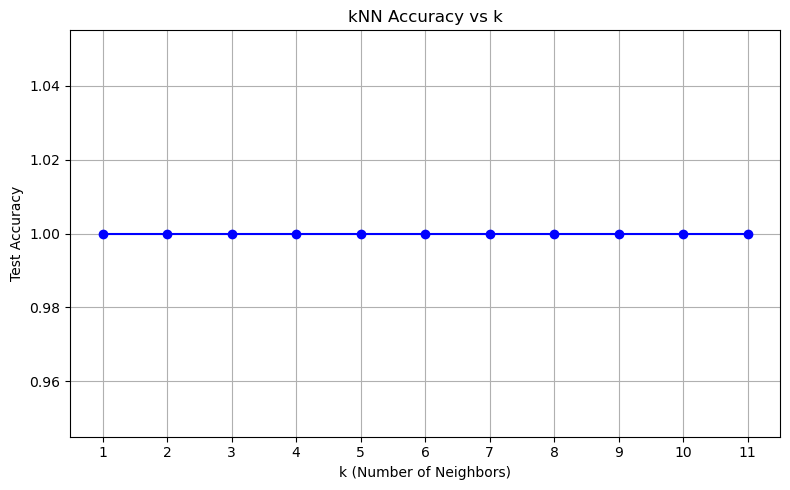

Model has a REGULAR FIT.


In [5]:
# A1

# Loads the dataset and splits it into features and labels.
# Returns:
#     X_train (array): Training features
#     X_test (array): Testing features
#     y_train (array): Training labels
#     y_test (array): Testing labels
X_train, X_test, y_train, y_test = load_and_split_data()

# Trains a k-Nearest Neighbors (kNN) classifier.
# Args:
#     X_train (array): Training features
#     y_train (array): Training labels
#     k (int): Number of neighbors
# Returns:
#     Trained KNeighborsClassifier model
knn_model = train_knn_model(X_train, y_train, k=3)

# Evaluates a model using confusion matrix and classification report.
# Args:
#     model: Trained classifier
#     X (array): Features to predict
#     y (array): True labels
# Returns:
#     confusion (array): Confusion matrix
#     report (dict): Classification metrics (precision, recall, f1-score)
#     accuracy (float): Accuracy score
cm_test, report_test, acc_test = evaluate_model(knn_model, X_test, y_test)
cm_train, report_train, acc_train = evaluate_model(knn_model, X_train, y_train)

# Results
print("=== Test Set Evaluation ===")
print("Confusion Matrix:\n", cm_test)
for cls, metrics in report_test.items():
    if cls.isdigit():  # Skip avg/accuracy rows
        print(f"Class {cls} → Precision: {metrics['precision']:.2f}, Recall: {metrics['recall']:.2f}, F1-Score: {metrics['f1-score']:.2f}")
print(f"Test Accuracy: {acc_test:.2f}\n")

print("=== Training Set Evaluation ===")
print("Confusion Matrix:\n", cm_train)
for cls, metrics in report_train.items():
    if cls.isdigit():
        print(f"Class {cls} → Precision: {metrics['precision']:.2f}, Recall: {metrics['recall']:.2f}, F1-Score: {metrics['f1-score']:.2f}")
print(f"Train Accuracy: {acc_train:.2f}\n")


sample = X_test[0].reshape(1, -1)
predicted = knn_model.predict(sample)
print(f"Predicted class for one test vector: {predicted[0]} (Actual: {y_test[0]})\n")

# Analyzes the model by taking a range of k values from 1 to 11
k_range = range(1, 12)
accuracies = plot_accuracy_vs_k(X_train, X_test, y_train, y_test, k_range)


# Overfitting: high training accuracy but low test accuracy.
# Underfitting: both train and test accuracies are low.
# Regular Fit: train and test accuracies are comparable and reasonably high.
if acc_train > 0.95 and acc_test < 0.85:
    print("Model is likely OVERFITTING.")
elif acc_train < 0.8 and acc_test < 0.8:
    print("Model is likely UNDERFITTING.")
else:
    print("Model has a REGULAR FIT.")


In [8]:
#A2

import pandas as pd

# Load the Excel file to examine its structure (sheet names and a preview of data)
excel_path = r"C:\Users\dhruv\Downloads\Lab Session Data.xlsx"

# Load sheet names
xls = pd.ExcelFile(excel_path)
sheet_names = xls.sheet_names

# Load the first sheet to preview
df_preview = xls.parse(sheet_names[0])
df_preview.head()

,Customer,Candies (#),Mangoes (Kg),Milk Packets (#),Payment (Rs),Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Candy,Mango,Milk
0,C_1,20,6,2,386,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,55.0,18.0
1,C_2,16,3,6,289,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C_3,27,6,2,393,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C_4,19,1,2,110,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C_5,24,4,2,280,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#A2

# Cleaning the data and selecting columns
df_clean = df_preview[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)', 'Payment (Rs)']].dropna()

# Renaming column
df_clean.columns = ['Candies', 'Mangoes', 'MilkPackets', 'Payment']

#features and target
X = df_clean[['Candies', 'Mangoes', 'MilkPackets']]
y = df_clean['Payment']

# Spliting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train kNN regressor with k=3
reg_model = KNeighborsRegressor(n_neighbors=3)
reg_model.fit(X_train, y_train)

# Prediction on test data
y_pred = reg_model.predict(X_test)

# evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, rmse, mape, r2


(3346.1111111111118, 57.8455798753121, 0.3212889038469711, 0.14265786027444038)

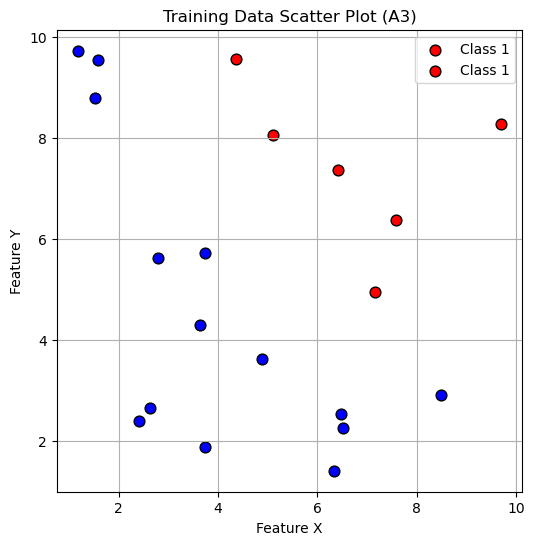

In [14]:
#A3

import numpy as np
import matplotlib.pyplot as plt

#Generate 20 random data points with 2 features (X, Y), values between 1 and 10
np.random.seed(42)  # For reproducibility
X_train = np.random.uniform(1, 10, (20, 2))  # 20 points, 2 features

#Define class labels using a simple rule: Class 0 if X + Y < 12, else Class 1
y_train = np.array([0 if x[0] + x[1] < 12 else 1 for x in X_train])

#Plot the training data points, colored by class
plt.figure(figsize=(6, 6))
for i in range(len(X_train)):
    color = 'blue' if y_train[i] == 0 else 'red'
    plt.scatter(X_train[i][0], X_train[i][1], c=color, s=60, edgecolors='black', label=f"Class {y_train[i]}" if i==0 or i==1 else "")

#Label plot
plt.title("Training Data Scatter Plot (A3)")
plt.xlabel("Feature X")
plt.ylabel("Feature Y")
plt.legend()
plt.grid(True)
plt.show()


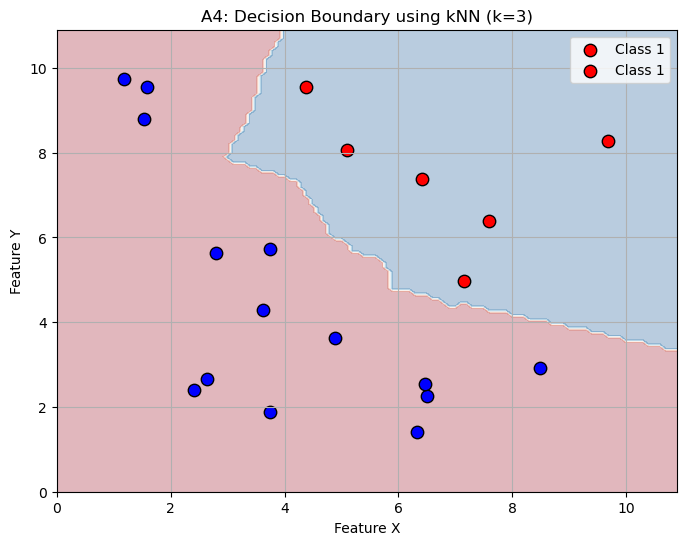

In [16]:
#A4


# Step 1: Train kNN classifier on training data
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Step 2: Create a mesh grid of 2D points across the range [0, 11] for both X and Y
x_min, x_max = 0, 11
y_min, y_max = 0, 11
h = 0.1  # Step size for grid

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Step 3: Flatten the grid to pass to the model and predict the class for each point
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = knn.predict(grid_points)
Z = Z.reshape(xx.shape)

# Step 4: Plot the decision boundaries
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.3)  # Red-Blue colormap for regions

# Step 5: Overlay the training data points
for i in range(len(X_train)):
    color = 'blue' if y_train[i] == 0 else 'red'
    plt.scatter(X_train[i][0], X_train[i][1], c=color, edgecolors='black', s=80, label=f"Class {y_train[i]}" if i==0 or i==1 else "")

# Step 6: Add labels and legend
plt.title("A4: Decision Boundary using kNN (k=3)")
plt.xlabel("Feature X")
plt.ylabel("Feature Y")
plt.legend()
plt.grid(True)
plt.show()


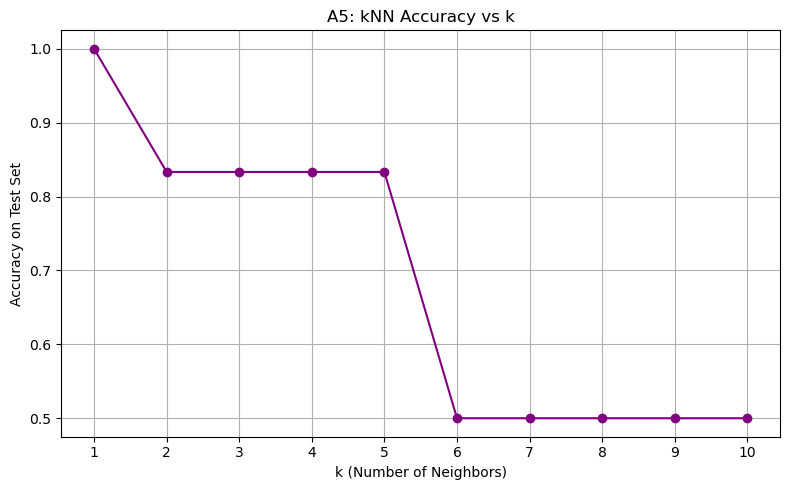

In [17]:
#A5

# Split the 20-point dataset into training and testing sets
X_sub_train, X_sub_test, y_sub_train, y_sub_test = train_test_split(
    X_train, y_train, test_size=0.3, random_state=42
)

# Try different k values and record accuracy
k_values = list(range(1, 11))
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_sub_train, y_sub_train)
    y_pred = knn.predict(X_sub_test)
    acc = accuracy_score(y_sub_test, y_pred)
    accuracies.append(acc)

# Plot accuracy vs k
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='purple')
plt.title("A5: kNN Accuracy vs k")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy on Test Set")
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.show()
